<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/02_Unsupervised_learning/03_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised clustering algorithm that groups together data points that are closely packed and marks points that lie alone in low-density regions as outliers.

- It doesn’t require the number of clusters in advance and works by defining clusters as areas of high point density separated by regions of low density.
- The two key parameters are **eps** (radius of neighborhood) and **min_samples** (minimum number of points to form a dense region).
- Points are classified as **core points** (enough neighbors within eps), **border points** (fewer neighbors but close to a core point), or **noise** (outliers).
- Clusters are formed by connecting core points and their reachable neighbors.

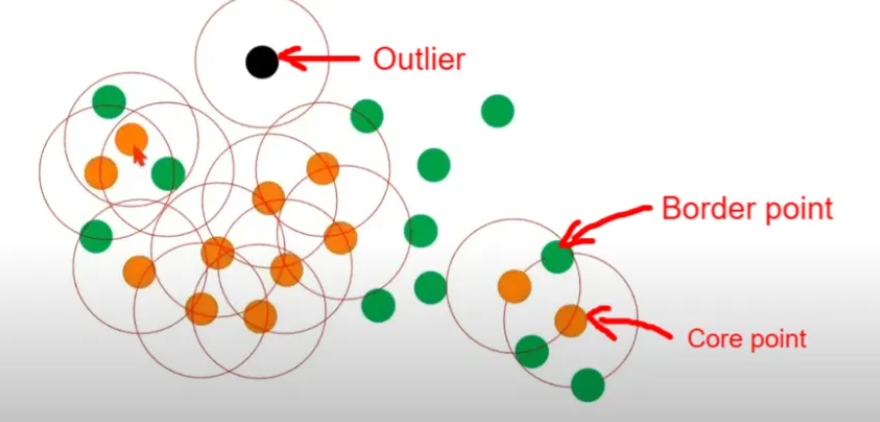


- DBSCAN can find clusters of arbitrary shape and is robust to outliers, making it useful for messy real-world data. However, it struggles when cluster densities vary a lot or in high-dimensional spaces where distance loses meaning.

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df=pd.read_csv('/content/Mall_customers.csv')

In [173]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [174]:
df.shape

(200, 5)

In [175]:
df=df.iloc[:,[3,4]].values

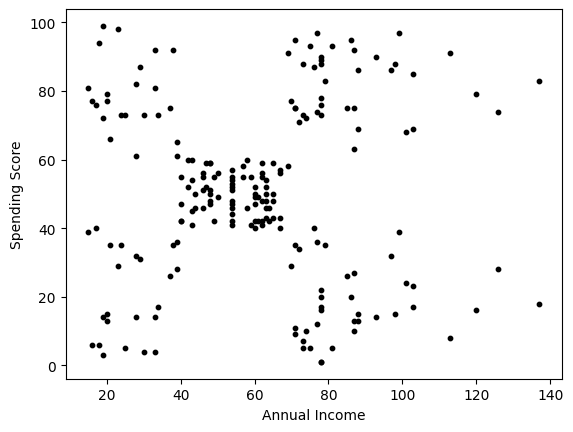

In [176]:
plt.scatter(df[:, 0], df[:, 1], s=10, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [177]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'wcss')

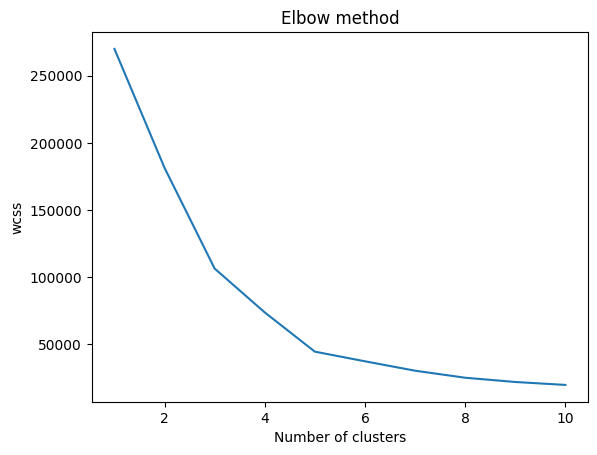

In [178]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,max_iter=300,n_init=10)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

Optimal number of clusters is 5, but we do not use this as a parameter in dbscan

In [179]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=10,min_samples=7) #trial and error based

In [180]:
labels=dbscan.fit_predict(df)

In [181]:
labels

array([ 2,  1,  0,  1,  2,  1,  0, -1,  0,  1,  0, -1,  0,  1,  0,  1,  2,
        1,  2, -1,  2,  1,  0,  1,  0,  1,  2, -1,  2,  1,  0,  1,  0, -1,
        0,  1,  0,  1,  2,  1,  2, -1,  2,  2,  2,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3,  4,  3, -1,  3, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [182]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

noise is labelled as -1

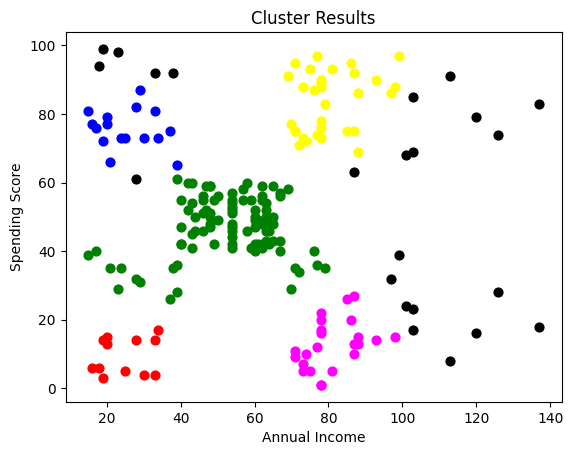

In [183]:
plt.scatter(df[labels==-1,0], df[labels==-1,1], s=40, c= "black")
plt.scatter(df[labels==0,0], df[labels==0,1], s=40, c= "red")
plt.scatter(df[labels==1,0], df[labels==1,1], s=40, c= "blue")
plt.scatter(df[labels==2,0], df[labels==2,1], s=40, c= "green")
plt.scatter(df[labels==3,0], df[labels==3,1], s=40, c= "yellow")
plt.scatter(df[labels==4,0], df[labels==4,1], s=40, c= "magenta")

plt.title("Cluster Results")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()